In [41]:
import cv2  # 이미지 데이터 ndarray
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset
import torchvision.models as models
from torchinfo import summary


import pickle       # 피클(pickle)된 데이터를 역직렬화(deserialize)**하는 함수


from PIL import Image   # 이미지 데이터 JPGImage

In [42]:
torch.__version__

'2.0.0+cu117'

In [43]:
DATA_file = r"C:\Users\Doyeon\Desktop\KDT\OpenCV\6class_Data/"
# "C:\Users\kjy19\OneDrive\Desktop\Project_image\Data"
DataList = os.listdir(DATA_file)

for item in DataList: print(item)

BearGGu
ChunSik
GomDyoRi
MangGom
Retriever
Wadada


In [44]:
# from torchvision.transforms import ToPILImage

# transform = transforms.ToTensor()
# image_tensor = transform(image)
# to_image = ToPILImage()
# pil_image = to_image(image_tensor)

In [45]:
transConver = transforms.Compose([
    transforms.Resize((180, 180)),
    transforms.ToTensor()
])

In [46]:
imgDS = ImageFolder(root=DATA_file, transform=transConver)

In [47]:
print(f'imgDS.classes        : {imgDS.classes}')
print(f'imgDS.class_to_idx   : {imgDS.class_to_idx}')
print(f'imgDS.targets        : {imgDS.targets}')
for img in imgDS.imgs:
    print(f'imgDS.imgs : {img}')

imgDS.classes        : ['BearGGu', 'ChunSik', 'GomDyoRi', 'MangGom', 'Retriever', 'Wadada']
imgDS.class_to_idx   : {'BearGGu': 0, 'ChunSik': 1, 'GomDyoRi': 2, 'MangGom': 3, 'Retriever': 4, 'Wadada': 5}
imgDS.targets        : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

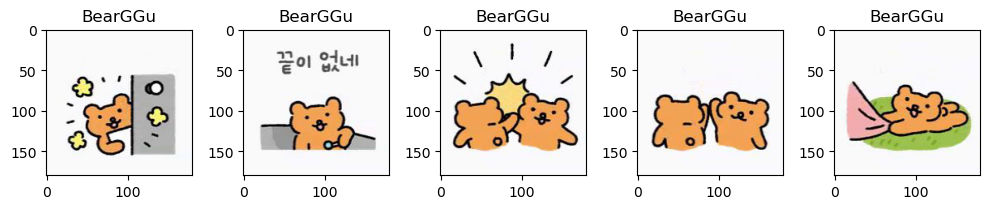

In [48]:
LABEL_NAMES = imgDS.classes

fig, axes=plt.subplots(1,5, figsize=(10, 4))
for idx, (img_data, target) in enumerate(imgDS) :
    axes[idx].imshow(img_data.permute(1,2,0))
    axes[idx].set_title(LABEL_NAMES[target])
    if idx==4: break
plt.tight_layout()
plt.show()

In [49]:
print(f'class 0 : {imgDS.targets.count(0)}')
print(f'class 1 : {imgDS.targets.count(1)}')
print(f'class 2 : {imgDS.targets.count(2)}')
print(f'class 3 : {imgDS.targets.count(3)}')

class 0 : 1767
class 1 : 1527
class 2 : 1213
class 3 : 1242


In [50]:
imgDS

Dataset ImageFolder
    Number of datapoints: 9218
    Root location: C:\Users\Doyeon\Desktop\KDT\OpenCV\6class_Data/
    StandardTransform
Transform: Compose(
               Resize(size=(180, 180), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

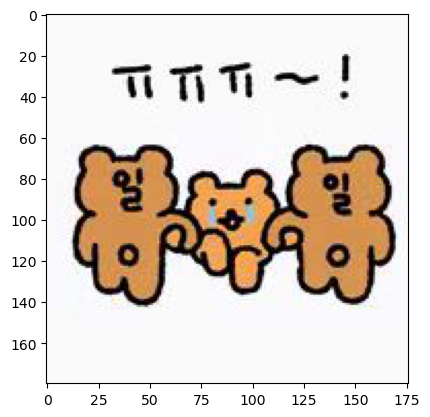

In [51]:
# plt.
img = Image.open(imgDS.imgs[234][0])
# img = np.array(img).astype(float)
plt.imshow(img)    # permute(1,2,0))

In [52]:
imgDS.classes
num_classes = len(imgDS.classes)
num_classes

6

In [53]:
# model = models.vgg16(weights = models.VGG16_Weights.IMAGENET1K_V1)

In [54]:
len(imgDS)

9218

In [55]:
from sklearn.model_selection import train_test_split

imgDS.classes
num_classes = len(imgDS.classes)
num_classes

# 클래스별 인덱스 수집
class_indices = {i: [] for i in range(num_classes)}  # num_classes는 총 클래스 수

for idx, (_, label) in enumerate(imgDS.imgs):
    class_indices[label].append(idx)

# 샘플링
train_indices = []
valid_indices = []
test_indices = []

for indices in class_indices.values():
    train, temp = train_test_split(indices, train_size=0.8, random_state=42)
    valid, test = train_test_split(temp, test_size=0.2, random_state=42)
    train_indices.extend(train)
    valid_indices.extend(valid)
    test_indices.extend(test)

# 최종 데이터셋 생성
trainDS = torch.utils.data.Subset(imgDS, train_indices)
validDS = torch.utils.data.Subset(imgDS, valid_indices)
testDS = torch.utils.data.Subset(imgDS, test_indices)

train_loader = DataLoader(trainDS, batch_size=32, shuffle=True)
val_loader = DataLoader(validDS, batch_size=32, shuffle=True)
test_loader = DataLoader(testDS, batch_size=32, shuffle=True)


In [56]:
from torchvision import models


model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 6)




# 마지막 분류 레이어 수정 (여기선 5개의 클래스를 예시로)
# num_classes = 4  # 네 데이터셋의 실제 클래스 수로 바꿔줘!
# model.classifier[6] = nn.Linear(4096, num_classes)

In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device == 'cuda':
    print("cuda")
else:
    print("cpu")
model = model.to(device)

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        nn.init.constant_(m.bias, 0)

model.apply(initialize_weights)
# 손실 함수와 옵티마이저 설정
class_weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

cpu


In [58]:
print(len(trainDS),
len(validDS),
len(testDS))

7371 1475 372


In [59]:
len(train_loader)

231

In [60]:
num_epochs = 3  # 원하는 에포크 수로 수정

train_loss_list = []
val_loss_list = []

train_ac_list = []
val_ac_list = []

class_ac_list = []
for epoch in range(num_epochs):
    model.train()
    
    t_running_loss = 0.0
    v_running_loss = 0.0

    t_correct = 0
    v_correct = 0

    t_total = 0
    v_total = 0

    class_correct = np.zeros(num_classes)
    class_total = np.zeros(num_classes)
    
    ## train
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # 모델 출력 계산
        outputs = model(images)
        
        # 손실 계산
        loss = criterion(outputs, labels)
        
        # 역전파 및 옵티마이저 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        t_running_loss += loss.item()
        
        # 정확도 계산
        _, predicted = torch.max(outputs.data, 1)
        t_total += labels.size(0)
        t_correct += (predicted == labels).sum().item()

    # ## val
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        
        # 모델 출력 계산
        outputs = model(images)
        
        # 손실 계산
        loss = criterion(outputs, labels)
                
        v_running_loss += loss.item()    

        # 정확도 계산
        _, predicted = torch.max(outputs.data, 1)
        v_total += labels.size(0)
        v_correct += (predicted == labels).sum().item()

    # 에포크 결과 출력
    t_epoch_loss = t_running_loss / len(train_loader)
    train_loss_list.append(t_epoch_loss)

    v_epoch_loss = v_running_loss / len(val_loader)
    val_loss_list.append(v_epoch_loss)


    train_epoch_accuracy = 100 * t_correct / t_total
    train_ac_list.append(train_epoch_accuracy)

    val_epoch_accuracy = 100 * v_correct / v_total
    val_ac_list.append(val_epoch_accuracy)


    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    print(f"Train       Loss: {t_epoch_loss:.4f}, Accuracy: {train_epoch_accuracy:.2f}%")
    print(f"Validaion   Loss: {v_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.2f}%")


    # 진행 
    # print()

 # 각 클래스에 대한 점수 계산
import winsound as sd
def beepsound():
    fr = 2000    # range : 37 ~ 32767
    du = 300     # 1000 ms ==1second
    sd.Beep(fr, du) # winsound.Beep(frequency, duration)
beepsound()

Epoch [1/3]
Train       Loss: 0.0767, Accuracy: 97.88%
Validaion   Loss: 0.0698, Accuracy: 99.80%
Epoch [2/3]
Train       Loss: 0.0029, Accuracy: 99.91%
Validaion   Loss: 0.0055, Accuracy: 99.86%
Epoch [3/3]
Train       Loss: 0.0013, Accuracy: 99.99%
Validaion   Loss: 0.0041, Accuracy: 99.86%


In [61]:
predicted

tensor([4, 5, 2], device='cuda:0')

In [62]:
outputs.shape

torch.Size([3, 6])

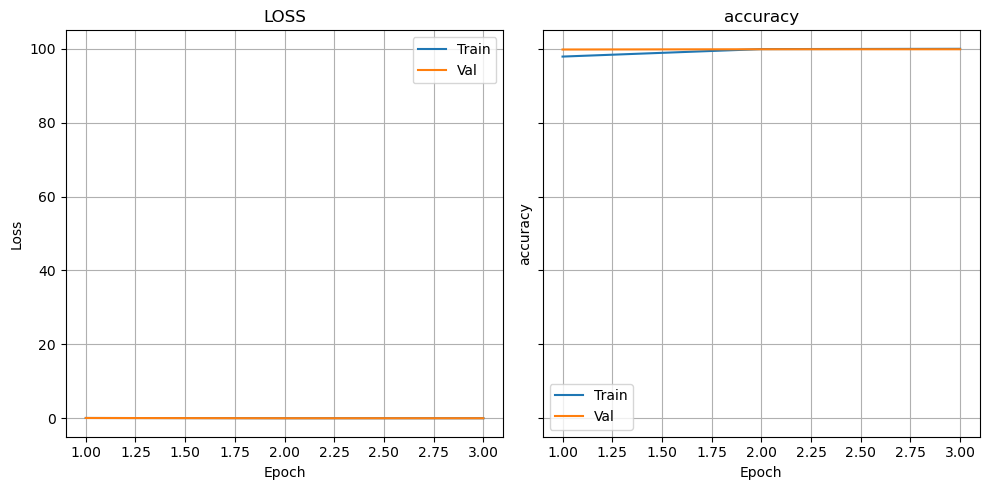

In [63]:
fg, axes=plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
axes[0].plot(range(1, len(val_loss_list)+1), train_loss_list, label='Train')
axes[0].plot(range(1, len(val_ac_list)+1), val_loss_list, label='Val')
axes[0].grid()
axes[0].legend()
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("LOSS")

axes[1].plot(range(1, len(val_loss_list)+1), train_ac_list, label='Train')
axes[1].plot(range(1,len(val_loss_list)+1), val_ac_list, label='Val')
axes[1].grid()
axes[1].legend()
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("accuracy")
axes[1].set_title("accuracy")
plt.tight_layout()
plt.show()

In [64]:
len(images)

3

In [65]:
outputs = model(images)
outputs

tensor([[  1.9381,  -0.4688,  -3.3279,  -1.6138,  12.9923,  -6.5315],
        [ -1.8482,   2.4735,  -6.1693,   2.1081,  -4.9509,  12.4725],
        [  2.5725,   3.5192,   7.0540,   5.6188,  -7.1139, -10.4399]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [66]:
# model.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in val_loader:
#         images, labels = images.to(device), labels.to(device)
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     print(f'Accuracy of the model on the validation images: {100 * correct / total:.2f}%')


In [67]:
# # plt.
# img = Image.open(imgDS.imgs[234][0])
# # img = np.array(img).astype(float)
# plt.imshow(img)    # permute(1,2,0))

In [68]:
# 저장 경로
SAVE_PATH = '../models/opencv/'
SAVE_FILE = '6class_final_model_train_wbs.pth'

# 경로상 폴더 존재 여부 체크
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# 모델 저장
torch.save(model, os.path.join(SAVE_PATH, SAVE_FILE))  # state_dict 저장

# 모델 저장
torch.save(model, os.path.join(SAVE_PATH, SAVE_FILE))  # state_dict 저장

# # 가중치 불러오기
# model.load_state_dict(torch.load(os.path.join(SAVE_PATH, SAVE_FILE)))  # 가중치 불러오기
# model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [69]:
# # 1. 이미지 파일 불러오기
# def load_image(image_path):
#     image = Image.open(image_path).convert('RGB')
#     return image

# # 2. 이미지 전처리 (모델 학습 시 사용한 전처리와 동일해야 함)
# preprocess = transforms.Compose([
#     # transforms.Resize((224, 224)),  # 이미지 크기 조정 (모델에 따라 조정 필요)
#     transforms.ToTensor(),          # 텐서로 변환
#     # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # 정규화 (VGG16 모델에 맞춘 값)
# ])

# # 3. 이미지를 모델에 전달
# def predict(image_path, model):
#     image = load_image(image_path)   # 이미지 로드
#     image = preprocess(image)        # 전처리 적용
#     image = image.unsqueeze(0)       # 배치 차원 추가 (batch_size, channels, height, width)
#     image = image.to(device)         # 이미지를 GPU/CPU로 이동

#     model.eval()                     # 모델을 평가 모드로 전환
#     # with torch.no_grad():
#     #     output = model(image)        # 예측 실행
#     #     _, predicted = torch.max(output, 1)  # 가장 높은 점수를 가진 클래스 예측

#     # return predicted.item()          # 예측한 클래스 인덱스 반환

# # 4. 모델 로드 및 예측 수행
# image_path = r'C:\Users\Doyeon\Desktop\KDT\OpenCV\test\u76.jpg'  # 예측할 이미지 경로
# model = torch.load(r'C:\Users\Doyeon\Desktop\KDT\models\opencvmodel_train_wbs.pth')  # 사전 학습된 모델 로드   C:\Users\Doyeon\Desktop\KDT\models\opencvmodel_train_wbs.pth
# # model = model.to(device)

# predicted_class = predict(image_path, model)
# print(f'Predicted class: {predicted_class}')


In [1]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image

preprocess = transforms.Compose([
    # transforms.Resize((224, 224)),  # 이미지 크기 조정 (모델에 따라 조정 필요)
    transforms.ToTensor()          # 텐서로 변환
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # 정규화 (VGG16 모델에 맞춘 값)
])

def predict(image_path, model):
    image = load_image(image_path)   # 이미지 로드
    image = preprocess(image)         # 전처리 적용
    image = image.unsqueeze(0)        # 배치 차원 추가
    image = image.to(device)          # 디바이스로 이동

    with torch.no_grad():             # 그라디언트 계산 비활성화
        outputs = model(image)        # 모델에 이미지 입력
        probabilities = torch.softmax(outputs, dim=1)  # 소프트맥스 적용
        # print(probabilities)          # 각 클래스에 대한 확률 출력
        _, predicted = torch.max(probabilities.data, 1)  # 예측 클래스

    return probabilities, predicted.item()


NameError: name 'transforms' is not defined

In [71]:
imgDS.classes

['BearGGu', 'ChunSik', 'GomDyoRi', 'MangGom', 'Retriever', 'Wadada']

In [72]:
# 모델 로드
model.load_state_dict(torch.load(r'C:\Users\Doyeon\Desktop\KDT\models\opencv\6class_final_model_train_wbs.pth'))  # 가중치 불러오기
model.eval()  # 모델 평가 모드로 전환
model.to(device)
# 예측할 이미지 경로
image_path = r'C:\Users\Doyeon\Desktop\KDT\OpenCV\Data_all\test\BearGGu\2u1033 (350).jpg'
# print(r"C:\Users\Doyeon\Desktop\KDT\OpenCV\test\u76.jpg")
# 예측 수행
predicted_class = predict(image_path, model)
print(f'Predicted class: {predicted_class}')


Predicted class: 0


In [73]:
# # 모델 로드
# model.load_state_dict(torch.load(r'C:\Users\Doyeon\Desktop\KDT\models\opencv\model_train_wbs.pth'))  # 가중치 불러오기
# model.eval()  # 모델 평가 모드로 전환
# model.to(device)
# # 예측할 이미지 경로
# image_path = r'C:\Users\Doyeon\Desktop\KDT\OpenCV\Data_all\test\Retriever\u744.jpg'
# print(r"C:\Users\Doyeon\Desktop\KDT\OpenCV\test\u76.jpg")
# # 예측 수행
# predicted_class = predict(image_path, model)
# print(f'Predicted class: {predicted_class}')

In [79]:
DATA_file = r"C:\Users\Doyeon\Desktop\KDT\test_test"
# "C:\Users\kjy19\OneDrive\Desktop\Project_image\Data"
DataList = os.listdir(DATA_file)

test_img = [item for item in DataList]

In [75]:
test_img[0]

'bearggu (1).jpg'

In [80]:
# 모델 로드
idx = 1
for imgs in test_img:
    FILE_PATH = r'C:\Users\Doyeon\Desktop\KDT\test_test/'
    image_path = FILE_PATH + imgs
    model.load_state_dict(torch.load(r'C:\Users\Doyeon\Desktop\KDT\models\opencv\6class_final_model_train_wbs.pth'))  # 가중치 불러오기
    model.eval()  # 모델 평가 모드로 전환
    model.to(device)
    # 예측할 이미지 경로
    # image_path = r'C:\Users\Doyeon\Desktop\KDT\OpenCV\Data_all\test\Retriever\u744.jpg'

    # print(r"C:\Users\Doyeon\Desktop\KDT\OpenCV\test\u76.jpg")
    # 예측 수행
    predicted_class = predict(image_path, model)
    # print(imgs)
    # print(f'{imgs} class :{predicted_class}', end="   |   ")
    print(f'{imgs} class :{predicted_class}')
    # if idx % 5 == 0:
    #     print()
    idx += 1

bearggu (1).jpg class :0
bearggu (2).jpg class :0
bearggu (3).jpg class :0
bearggu (4).jpg class :0
bearggu (5).jpg class :0
chunsik (1).jpg class :1
chunsik (2).jpg class :1
chunsik (3).jpg class :1
chunsik (4).jpg class :1
chunsik (5).jpg class :1
Gomdyori (1).jpg class :2
Gomdyori (2).jpg class :2
Gomdyori (3).jpg class :2
Gomdyori (4).jpg class :2
Gomdyori (5).jpg class :2
MangGom (1).jpg class :3
MangGom (2).jpg class :3
MangGom (3).jpg class :3
MangGom (4).jpg class :3
MangGom (5).jpg class :3
Retriever (1).jpg class :4
Retriever (2).jpg class :4
Retriever (3).jpg class :4
Retriever (4).jpg class :4
Retriever (5).jpg class :4
Wadada (1).jpg class :5
Wadada (2).jpg class :5
Wadada (3).jpg class :5
Wadada (4).jpg class :5
Wadada (5).jpg class :5
